In [1]:
import requests

In [21]:
url = 'https://data.kma.go.kr/stcs/grnd/downloadGrndTaList.do'
r=requests.get(url)

In [22]:
payload = {
'fileType': 'csv',
'pgmNo': '70',
'menuNo': '432',
'serviceSe': 'F00101',
'stdrMg': '99999',
'startDt': '20170101',
'endDt': '20220803',
'taElement': 'MIN',
'taElement': 'AVG',
'taElement': 'MAX',
'stnGroupSns': '',
'selectType': '1',
'mddlClssCd': 'SFC01',
'dataFormCd': 'F00501',
'dataTypeCd': 'standard',
'startDay': '20170101',
'startYear': '2022',
'endDay': '20220803',
'endYear': '2022',
'startMonth':'01',
'endMonth': '12',
'sesnCd': '0',
'txtStnNm': '대구',
'stnId': '143',
'areaId': '',
'gFontSize': ''
}

In [23]:
r = requests.post(url, data=payload)
r.status_code

200

In [24]:
print(r.text)

기온분석
[검색조건]
자료구분 : 일
자료형태 : 기본
지역/지점 : 대구
기간 : 20170101~20220803

날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
2017-01-01,143,3.4,-2,10
2017-01-02,143,5.3,-0.4,12.3
2017-01-03,143,5.2,0.9,10.9
2017-01-04,143,3.9,-1.9,11.2
2017-01-05,143,3.4,-1.6,7.6
2017-01-06,143,4.9,0.7,8.4
2017-01-07,143,3.3,-2.7,8.1
2017-01-08,143,7.4,4.4,13
2017-01-09,143,6.2,2.2,9.4
2017-01-10,143,1.7,-0.7,5.5
2017-01-11,143,-0.7,-4.6,3.3
2017-01-12,143,1.2,-3.9,8.2
2017-01-13,143,-0.6,-3.2,4.7
2017-01-14,143,-4.3,-6.8,-0.7
2017-01-15,143,-3.3,-8.2,2.8
2017-01-16,143,-1.4,-7.2,5.6
2017-01-17,143,-1,-7.8,7.1
2017-01-18,143,2.1,-3.3,6.6
2017-01-19,143,1.2,-4.3,8.3
2017-01-20,143,-0.7,-3.7,1.8
2017-01-21,143,-1.3,-6.8,3.3
2017-01-22,143,-2.7,-5.6,-0.4
2017-01-23,143,-4.4,-7.8,-0.5
2017-01-24,143,-2.6,-6.8,2.4
2017-01-25,143,-2.2,-9,4.4
2017-01-26,143,-0.3,-8.6,8.1
2017-01-27,143,3.7,-0.2,7.9
2017-01-28,143,2,-5.6,9.7
2017-01-29,143,3.9,1.1,6.3
2017-01-30,143,0.8,-3.3,4.8
2017-01-31,143,-0.6,-7.3,6.6
2017-02-01,143,0.8,-2,5.5
2017-

In [28]:
def genPayload(stnId,startDay,endDay):
    payload = {
    'fileType': 'csv',
    'pgmNo': '70',
    'menuNo': '432',
    'serviceSe': 'F00101',
    'stdrMg': '99999',
    'startDt': str(startDay),
    'endDt': str(endDay),
    'taElement': 'MIN',
    'taElement': 'AVG',
    'taElement': 'MAX',
    'stnGroupSns': '',
    'selectType': '1',
    'mddlClssCd': 'SFC01',
    'dataFormCd': 'F00501',
    'dataTypeCd': 'standard',
    'startDay': str(startDay),
    'startYear': '2022',
    'endDay': str(endDay),
    'endYear': '2022',
    'startMonth':'01',
    'endMonth': '12',
    'sesnCd': '0',
    'txtStnNm': '대구',
    'stnId': str(stnId),
    'areaId': '',
    'gFontSize': ''
    }
    return payload

In [29]:
genPayload(143,20210101,20220803)

{'fileType': 'csv',
 'pgmNo': '70',
 'menuNo': '432',
 'serviceSe': 'F00101',
 'stdrMg': '99999',
 'startDt': '20210101',
 'endDt': '20220803',
 'taElement': 'MAX',
 'stnGroupSns': '',
 'selectType': '1',
 'mddlClssCd': 'SFC01',
 'dataFormCd': 'F00501',
 'dataTypeCd': 'standard',
 'startDay': '20210101',
 'startYear': '2022',
 'endDay': '20220803',
 'endYear': '2022',
 'startMonth': '01',
 'endMonth': '12',
 'sesnCd': '0',
 'txtStnNm': '대구',
 'stnId': '143',
 'areaId': '',
 'gFontSize': ''}

In [30]:
def downloadTempCSV(stnId, startDay, endDay):
    stnId=str(stnId)
    startDay = str(startDay)
    endDay = str(endDay)
    url = 'https://data.kma.go.kr/stcs/grnd/downloadGrndTaList.do'
    payload=genPayload(stnId, startDay, endDay)
    filename=stnId+"_"+startDay+endDay+'.csv'
    r = requests.post(url,data=payload)
    if r.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(r.content)
        print(filename+"다운로드 완료")
    else:
        print(filename+"다운로드 실패")

In [31]:
downloadTempCSV(143,20220801,20220803)

143_2022080120220803.csv다운로드 완료


In [32]:
import pandas as pd

In [33]:
temp = pd.read_csv('143_2022080120220803.csv', skiprows=7, encoding='ms949')

In [34]:
temp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2022-08-01,143,29.4,26.8,31.2
1,2022-08-02,143,27.9,25.7,32.6
2,2022-08-03,143,30.6,26.3,37.1


In [35]:
# 지점, 시작날짜, 끝날짜 -> 각 월별 최고기온, 최저기온 출력

In [58]:
import matplotlib.pyplot as plt

In [77]:
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [78]:
def genPayload(stnId,startDay,endDay):
    payload = {
    'fileType': 'csv',
    'pgmNo': '70',
    'menuNo': '432',
    'serviceSe': 'F00101',
    'stdrMg': '99999',
    'startDt': str(startDay),
    'endDt': str(endDay),
    'taElement': 'MIN',
    'taElement': 'AVG',
    'taElement': 'MAX',
    'stnGroupSns': '',
    'selectType': '1',
    'mddlClssCd': 'SFC01',
    'dataFormCd': 'F00501',
    'dataTypeCd': 'standard',
    'startDay': str(startDay),
    'startYear': '2022',
    'endDay': str(endDay),
    'endYear': '2022',
    'startMonth':'01',
    'endMonth': '12',
    'sesnCd': '0',
    'txtStnNm': '대구',
    'stnId': str(stnId),
    'areaId': '',
    'gFontSize': ''
    }
    return payload

In [79]:
def downloadTempCSV(stnId, startDay, endDay):
    stnId=str(stnId)
    startDay = str(startDay)
    endDay = str(endDay)
    url = 'https://data.kma.go.kr/stcs/grnd/downloadGrndTaList.do'
    payload=genPayload(stnId, startDay, endDay)
    filename=stnId+"_"+startDay+endDay+'.csv'
    r = requests.post(url,data=payload)
    if r.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(r.content)
        print(filename+"다운로드 완료")
        return filename
    else:
        print(filename+"다운로드 실패")
        return None

In [96]:
def top_temp(stnId, startDay, endDay):
    stnId=str(stnId)
    startDay = str(startDay)
    endDay = str(endDay)
    name_csv = downloadTempCSV(stnId,startDay,endDay)
    #name_csv = stnId+"_"+startDay+endDay+".csv"
    if name_csv == None:
        print("잘못된 설정을 입력하셨습니다.")
        return None
    temp = pd.read_csv(name_csv,skiprows=7, encoding = 'ms949',
        index_col = '날짜', parse_dates=['날짜'])
    temp.columns = ['지점','평균기온', '최저기온','최고기온']
    temp_ann = temp.to_period('M')
    high_temp = temp_ann.groupby('날짜')['최고기온'].max()
    low_temp = temp_ann.groupby('날짜').min()['최저기온']
    result = pd.merge(high_temp, low_temp, on='날짜')
    result[['최고기온','최저기온']].plot(kind='bar', grid=True, figsize=(10,10))
    plt.figure(figsize=(10,10),dpi = 200,facecolor='white')
    plt.show()
    return result

In [85]:
#result = top_temp(143,20220101,20220803)
#result

In [86]:
def mproject():
    stnId = input('지점을 입력하세요:')
    startDay = input('시작하는 날:')
    endDay = input('마지막 날:')
    result = top_temp(stnId,startDay,endDay)
    return result

지점을 입력하세요:143
시작하는 날:20220101
마지막 날:20220803
143_2022010120220803.csv다운로드 완료


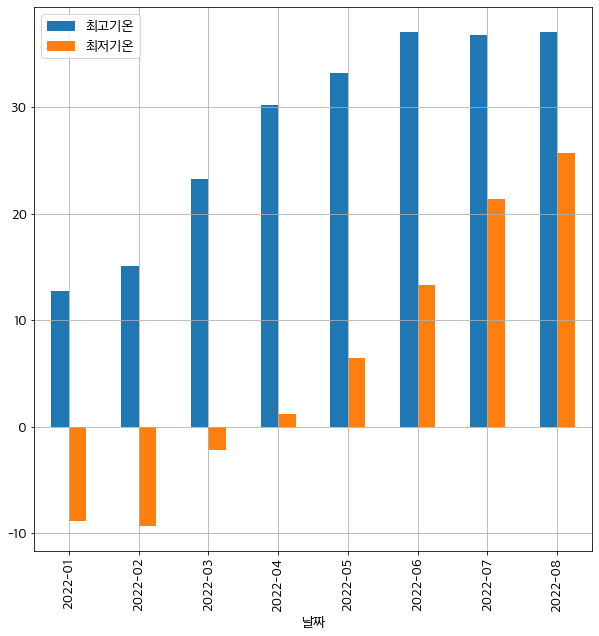

<Figure size 2000x2000 with 0 Axes>

,최고기온,최저기온
날짜,,
2022-01,12.8,-8.8
2022-02,15.1,-9.3
2022-03,23.3,-2.2
2022-04,30.2,1.2
2022-05,33.2,6.5
2022-06,37.1,13.3
2022-07,36.8,21.4
2022-08,37.1,25.7


In [97]:
mproject()